In [2]:
%load_ext autoreload
import subprocess
import numpy as np
import numpy.random as npr
from OSim import object
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Ellipse
import subprocess
from ipywidgets import interact

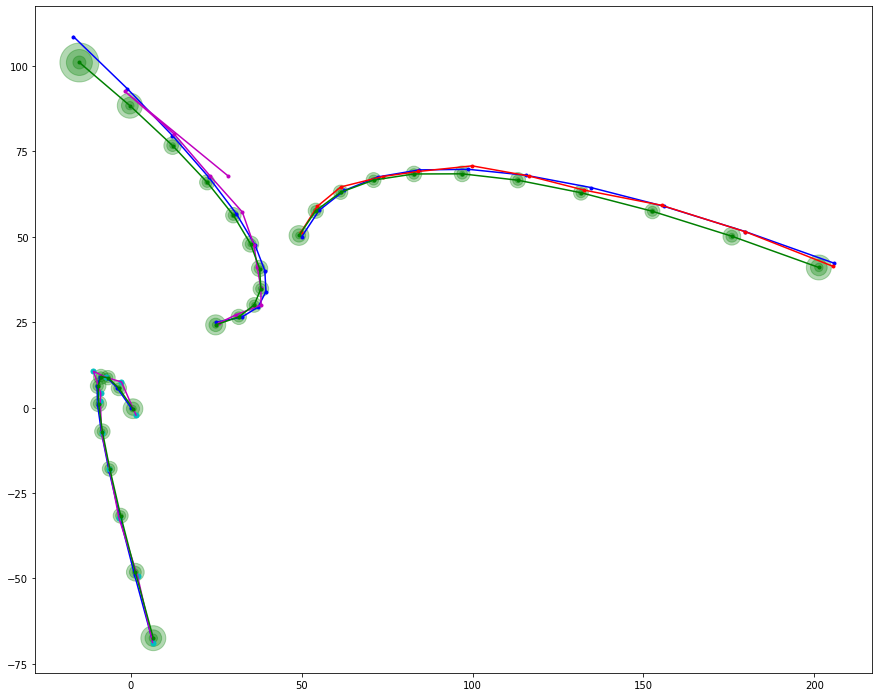

In [181]:
%autoreload 2
import numpy as np
import numpy.random as npr
from OSim import object

timesteps = 10
speed = 10
accel = 3*1
ellipseScaling = 1


o1 = object("1", 50, 50)
o2 = object("2", 25, 25)
o3 = object("3", 0, 0)
# o2.move(timesteps, speed)
# o1.accelerate(timesteps, speed, 1)
# o2.accelerate(timesteps, speed, 1)
# o3.accelerate(timesteps, speed, 1)
o1.curve(timesteps, speed, accel)
o2.curve(timesteps, speed, accel)
o3.curve(timesteps, speed, accel)
# print(o1.tag, " should now exist with x at: ", o1.XPosList[0])
# meas = o1.measure()
meas = o1.clutterMeasure(0.05,50)
noise = o2.clutterMeasure(0.05,50)
# noise = o1.dirAbnormalDrivel(100)
# noise2 = o1.dirAbnormalDrivel(100)
noise2 = o3.clutterMeasure(0.05,50)


# with open('../cutting_emdw/build/src/bin/Xpos.txt', 'w') as f:
#     print(np.array2string(meas[0]))
#     f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))

# with open('../cutting_emdw/build/src/bin/Ypos.txt', 'w') as f:
#     f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))
    
with open('Xpos.txt', 'w') as f:
    f.writelines(np.array2string(noise[0], separator=',', suppress_small=True))
    f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))
    f.writelines(np.array2string(noise2[0], separator=',', suppress_small=True))


with open('Ypos.txt', 'w') as f:
    f.writelines(np.array2string(noise[1], separator=',', suppress_small=True))
    f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))
    f.writelines(np.array2string(noise2[1], separator=',', suppress_small=True))

# with open('dir.txt', 'w') as f:
#     f.write(str(dir))

# subprocess.call(['./OsAcuNicBu','7'])
subprocess.call(['./Ch34Demo','1', 'n', '3', '3'])
pred = [None,None,None,None]
pred2 = [None,None,None,None]
pred3 = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]
    pred2[0] = [float(x) for x in f.readline().split(",")]
    pred3[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]
    pred2[1] = [float(y) for y in f.readline().split(",")]
    pred3[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    pred2[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    pred3[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    pred2[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    pred3[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

plt.rcParams["figure.figsize"] = (15,15)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(o1.XPosList, o1.YPosList, 'b.', markersize=6)
plt.plot(o1.XPosList, o1.YPosList, 'b')
plt.plot(meas[0], meas[1], 'r.', markersize=6)
plt.plot(meas[0], meas[1], 'r')
plt.plot(pred[0], pred[1], 'g.', markersize=6)
plt.plot(pred[0], pred[1], 'g')

plt.plot(o2.XPosList, o2.YPosList, 'b.', markersize=6)
plt.plot(o2.XPosList, o2.YPosList, 'b')
plt.plot(noise[0], noise[1], 'm.', markersize=6)
plt.plot(noise[0], noise[1], 'm')
plt.plot(pred2[0], pred2[1], 'g.', markersize=6)
plt.plot(pred2[0], pred2[1], 'g')

plt.plot(o3.XPosList, o3.YPosList, 'b.', markersize=6)
plt.plot(o3.XPosList, o3.YPosList, 'b')
plt.plot(noise2[0], noise2[1], 'c.', markersize=10)
plt.plot(noise2[0], noise2[1], 'm')
plt.plot(pred3[0], pred3[1], 'g.', markersize=6)
plt.plot(pred3[0], pred3[1], 'g')





for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)

    
for i in range(len(pred2[0])):
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*pred2[2][i], ellipseScaling*pred2[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*2*pred2[2][i], ellipseScaling*2*pred2[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*3*pred2[2][i], ellipseScaling*3*pred2[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)

for i in range(len(pred3[0])):
    ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*pred3[2][i], ellipseScaling*pred3[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*2*pred3[2][i], ellipseScaling*2*pred3[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)
    ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*3*pred3[2][i], ellipseScaling*3*pred3[3][i], alpha=0.3, color = 'g')
    ax.add_artist(ellipse)


1.2745456074239951
1.499298770742346


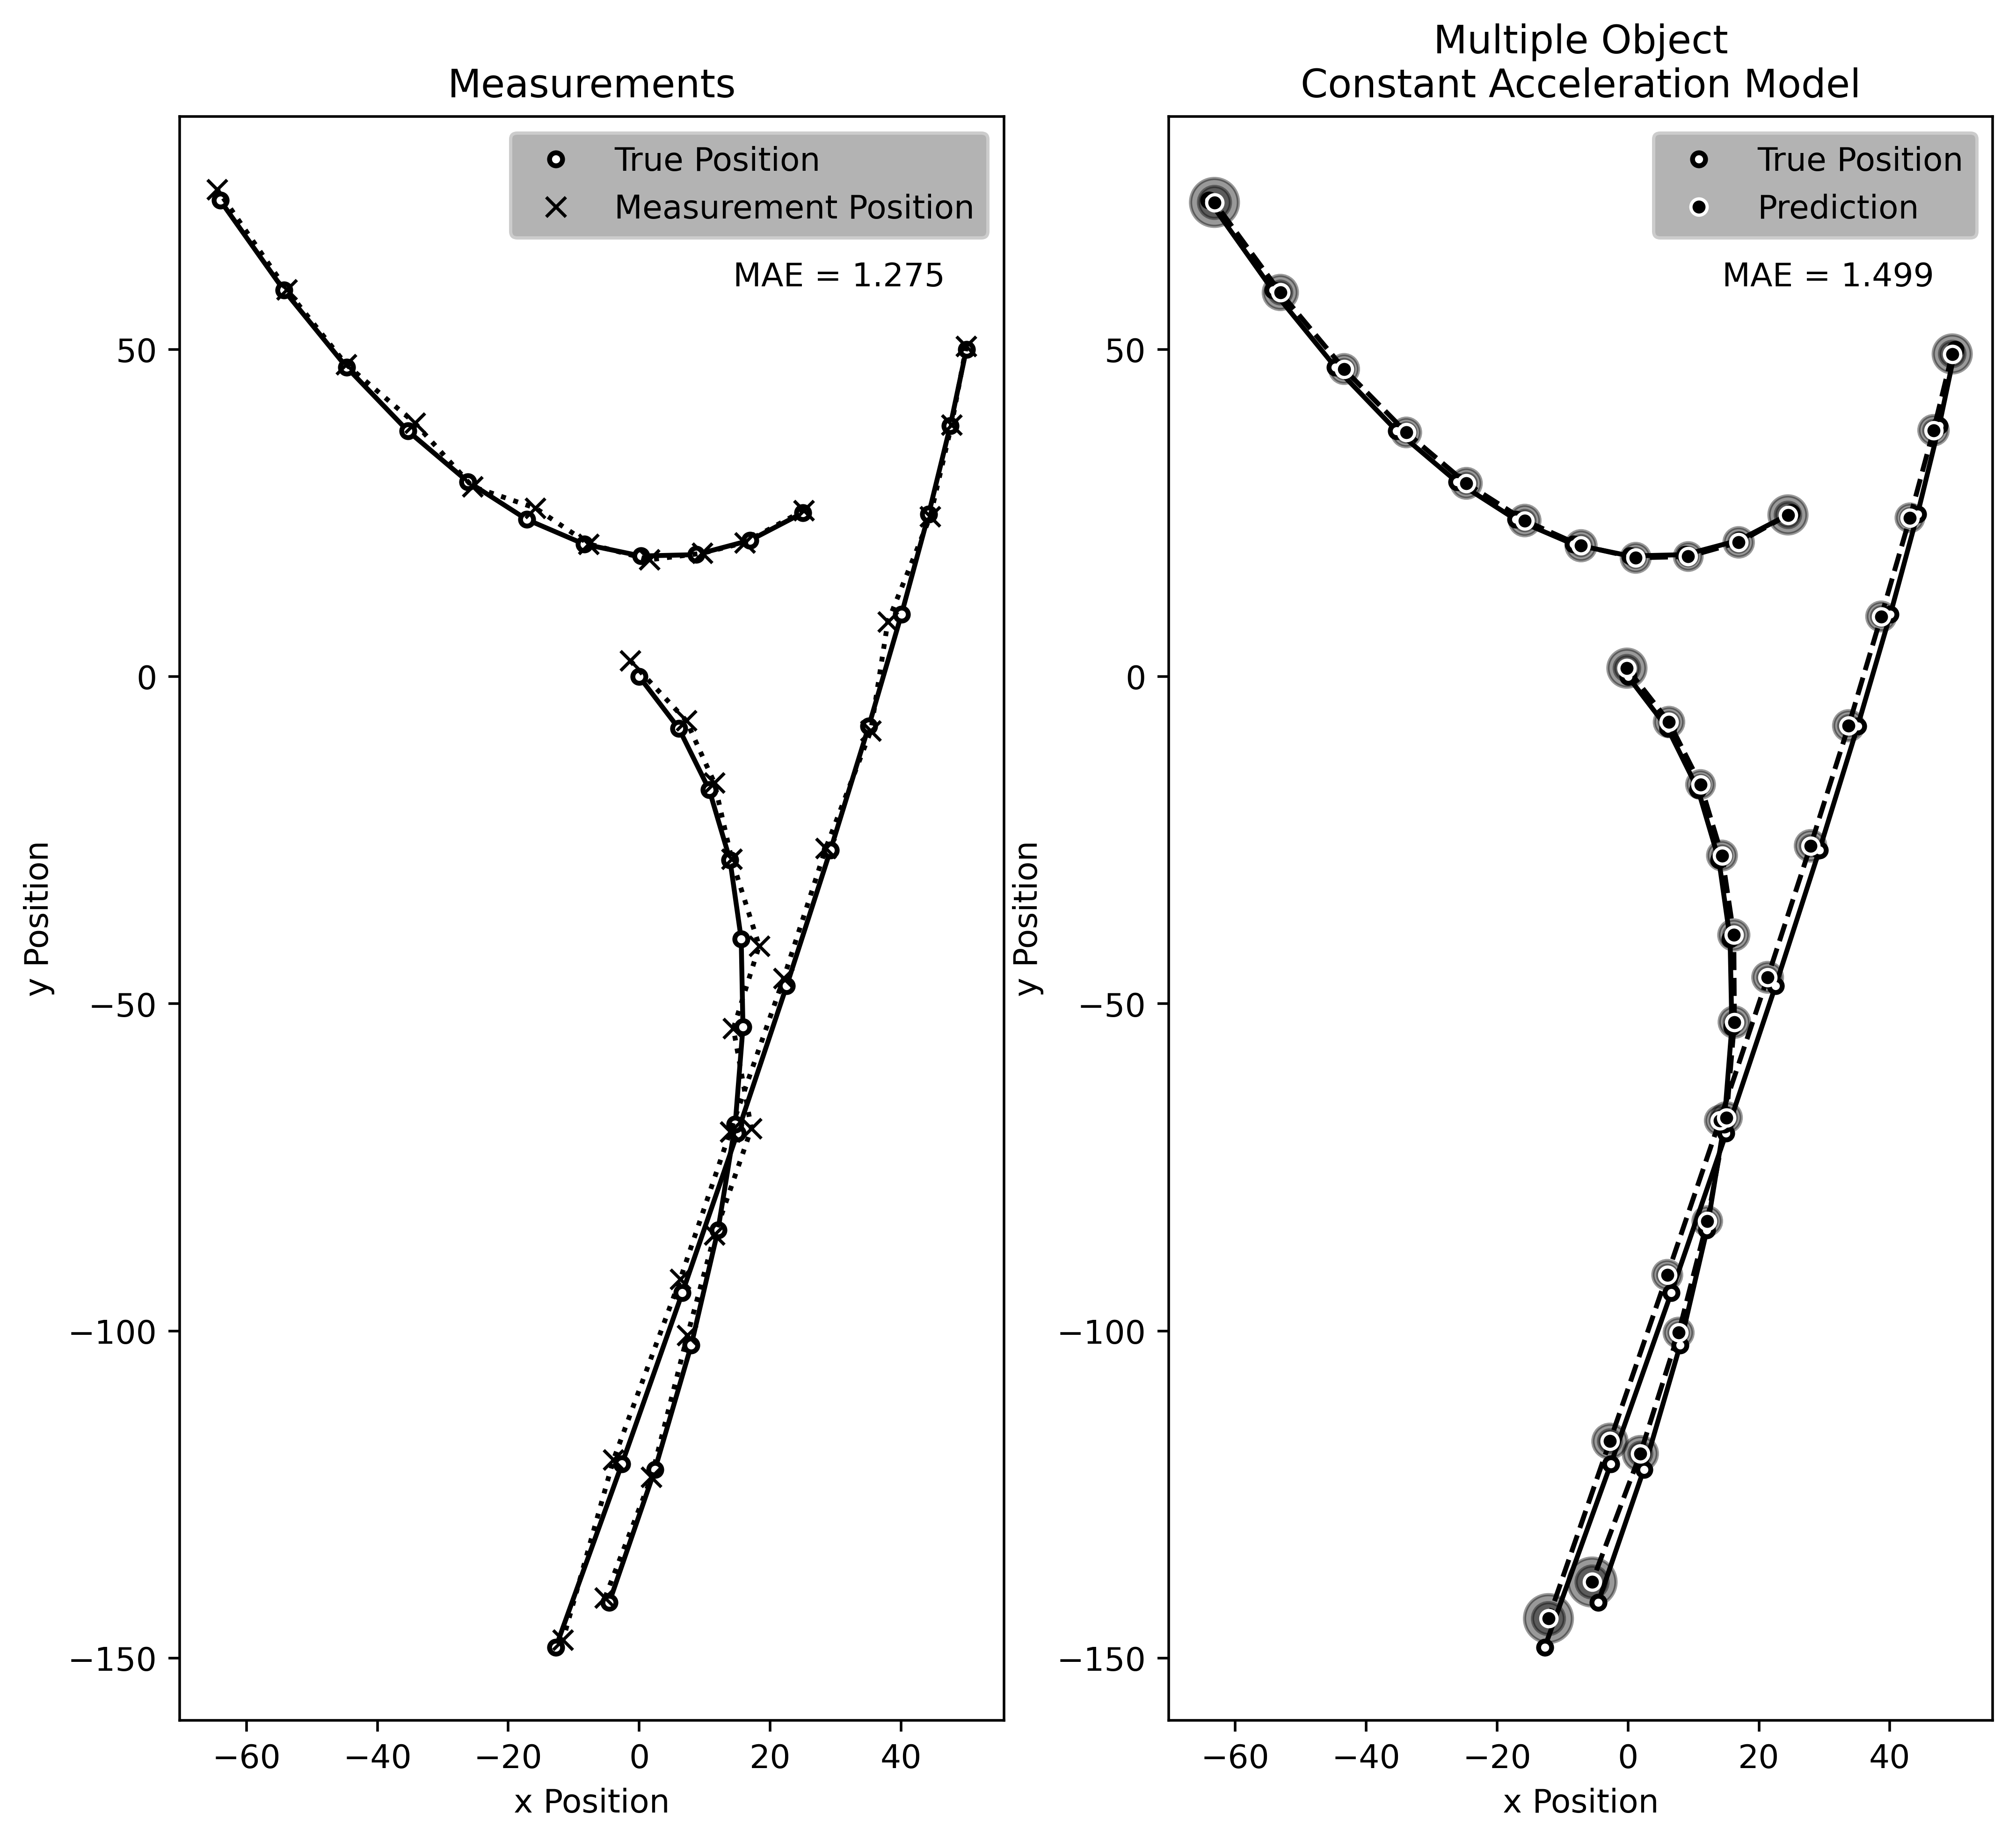

In [75]:
subprocess.call(['./Ch34Demo','1', 'n', '3', '3'])
pred = [None,None,None,None]
pred2 = [None,None,None,None]
pred3 = [None,None,None,None]
with open('xPred.txt', 'r') as f:
    pred[0] = [float(x) for x in f.readline().split(",")]
    pred2[0] = [float(x) for x in f.readline().split(",")]
    pred3[0] = [float(x) for x in f.readline().split(",")]

with open('yPred.txt', 'r') as f:
    pred[1] = [float(y) for y in f.readline().split(",")]
    pred2[1] = [float(y) for y in f.readline().split(",")]
    pred3[1] = [float(y) for y in f.readline().split(",")]

with open('xCovPred.txt', 'r') as f:
    pred[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    pred2[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    pred3[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
    

with open('yCovPred.txt', 'r') as f:
    pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    pred2[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    pred3[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]

distErr = [0,0,0]

plt.rcParams["figure.figsize"] = (10,10)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(500)

ax1.plot(o1.XPosList, o1.YPosList, 'black')
ax1.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')
ax1.plot(o2.XPosList, o2.YPosList, 'black')
ax1.plot(o2.XPosList, o2.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5)
ax1.plot(o3.XPosList, o3.YPosList, 'black')
ax1.plot(o3.XPosList, o3.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5)


ax1.plot(meas[0], meas[1], 'black', linestyle='dotted')
ax1.plot(meas[0], meas[1], 'x', color='black', markersize=6, label='Measurement Position')
ax1.plot(noise[0], noise[1], 'black', linestyle='dotted')
ax1.plot(noise[0], noise[1], 'x', color='black', markersize=6)
ax1.plot(noise2[0], noise2[1], 'black', linestyle='dotted')
ax1.plot(noise2[0], noise2[1], 'x', color='black', markersize=6)

ax1.set_title('Measurements')
ax1.set_xlabel('x Position')
ax1.set_ylabel('y Position')
ax1.legend(facecolor=[0.7,0.7,0.7], framealpha=1, loc='upper right')

distError = 0
for point in range(len(meas[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-meas[0][point],2)+np.power(o1.YPosList[point]-meas[1][point],2))
    dist += np.sqrt(np.power(o2.XPosList[point]-noise[0][point],2)+np.power(o2.YPosList[point]-noise[1][point],2))
    dist += np.sqrt(np.power(o3.XPosList[point]-noise2[0][point],2)+np.power(o3.YPosList[point]-noise2[1][point],2))
    distError += dist
distError /= len(meas[0])*3
print(distError)
ax1.text(0.8, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)



ax2.plot(o1.XPosList, o1.YPosList, 'black')
ax2.plot(o2.XPosList, o2.YPosList, 'black')
ax2.plot(o3.XPosList, o3.YPosList, 'black')
ax2.plot(pred[0], pred[1], 'black', linestyle='dashed')
ax2.plot(pred2[0], pred2[1], 'black', linestyle='dashed')
ax2.plot(pred3[0], pred3[1], 'black', linestyle='dashed')

ax2.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')
ax2.plot(o2.XPosList, o2.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5)
ax2.plot(o3.XPosList, o3.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5)
ax2.plot(pred[0], pred[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1, label='Prediction')
ax2.plot(pred2[0], pred2[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1)
ax2.plot(pred3[0], pred3[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1)

ax2.set_title('Multiple Object\nConstant Acceleration Model')
ax2.set_xlabel('x Position')
ax2.set_ylabel('y Position')
ax2.legend(facecolor=[0.7,0.7,0.7], framealpha=1, loc='upper right')

distError = 0
for point in range(len(pred[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
    dist += np.sqrt(np.power(o2.XPosList[point]-pred2[0][point],2)+np.power(o2.YPosList[point]-pred2[1][point],2))
    dist += np.sqrt(np.power(o3.XPosList[point]-pred3[0][point],2)+np.power(o3.YPosList[point]-pred3[1][point],2))
    distError += dist
distError /= len(pred[0])*3
print(distError)
ax2.text(0.8, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

# ax1.set_xlim(-15,100)
# ax1.set_ylim(-135,75)
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax1.set_aspect('equal')
ax2.set_aspect('equal')

for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)

for i in range(len(pred2[0])):
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*pred2[2][i], ellipseScaling*pred2[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*2*pred2[2][i], ellipseScaling*2*pred2[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred2[0][i], pred2[1][i]), ellipseScaling*3*pred2[2][i], ellipseScaling*3*pred2[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)

for i in range(len(pred3[0])):
    ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*pred3[2][i], ellipseScaling*pred3[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*2*pred3[2][i], ellipseScaling*2*pred3[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred3[0][i], pred3[1][i]), ellipseScaling*3*pred3[2][i], ellipseScaling*3*pred3[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)

# ax1.set_xlim(-25,105)
# ax1.set_ylim(-135,75)
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax1.set_aspect('equal')
ax2.set_aspect('equal')

plt.savefig('MOOcclusion3.pdf', bbox_inches='tight', dpi=500)

18.45870526195844
2.2111680276073717


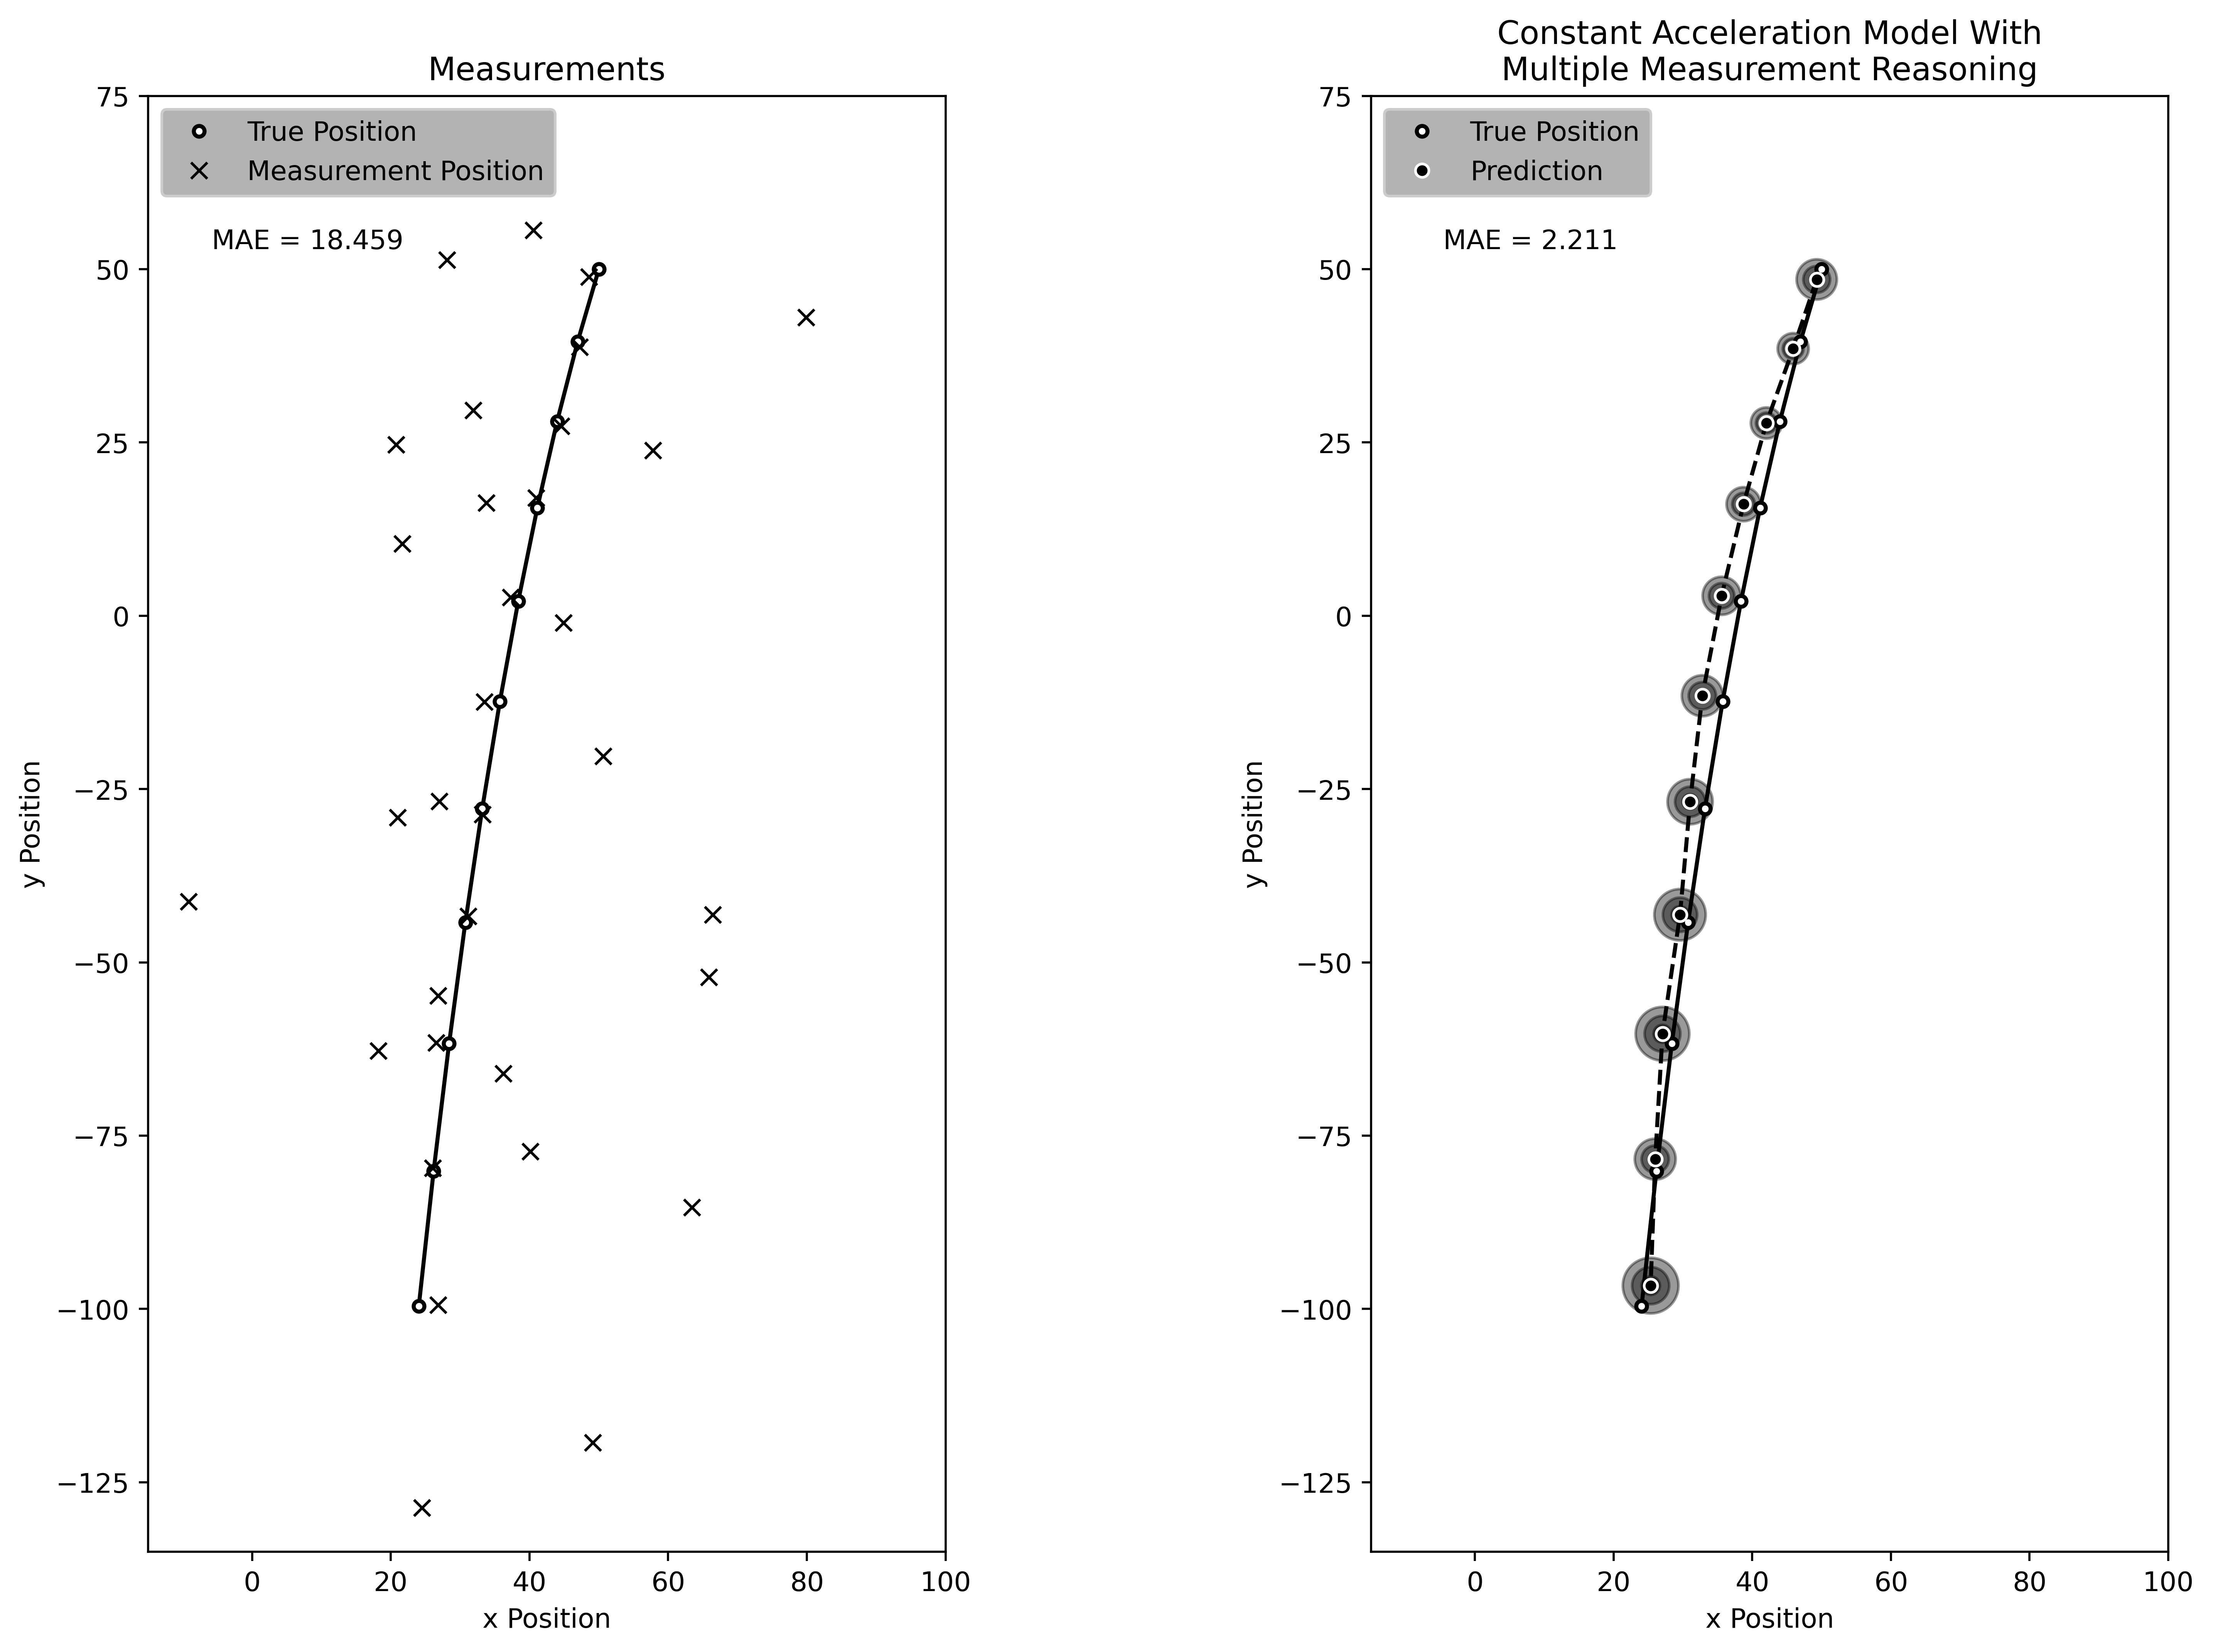

In [388]:
# timesteps = 10
# speed = 10
# accel = 1*1
# ellipseScaling = 1


# o1 = object("1", 50, 50)
# o2 = object("2", 25, 25)
# o3 = object("3", 0, 0)
# # o2.move(timesteps, speed)
# # o1.accelerate(timesteps, speed, 1)
# # o2.accelerate(timesteps, speed, 1)
# # o3.accelerate(timesteps, speed, 1)
# o1.curve(timesteps, speed, accel)
# o2.curve(timesteps, speed, accel)
# o3.curve(timesteps, speed, accel)
# # print(o1.tag, " should now exist with x at: ", o1.XPosList[0])
# # meas = o1.measure()
# meas = o1.clutterMeasure(0.05,50)
# # noise = o2.clutterMeasure(0.05,50)
# noise = o1.dirAbnormalDrivel(40)
# noise2 = o1.dirAbnormalDrivel(40)
# # noise2 = o3.clutterMeasure(0.05,50)

distErr = [0,0,0]

plt.rcParams["figure.figsize"] = (15,10)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(500)

ax1.plot(o1.XPosList, o1.YPosList, 'black')
ax1.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')

# ax1.plot(meas[0], meas[1], 'black', linestyle='dotted')
ax1.plot(meas[0], meas[1], 'x', color='black', markersize=6, label='Measurement Position')
ax1.plot(noise[0], noise[1], 'x', color='black', markersize=6)
ax1.plot(noise2[0], noise2[1], 'x', color='black', markersize=6)

ax1.set_title('Measurements')
ax1.set_xlabel('x Position')
ax1.set_ylabel('y Position')
ax1.legend(facecolor=[0.7,0.7,0.7], framealpha=1, loc='upper left')

distError = 0
for point in range(len(meas[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-meas[0][point],2)+np.power(o1.YPosList[point]-meas[1][point],2))
    dist += np.sqrt(np.power(o1.XPosList[point]-noise[0][point],2)+np.power(o1.YPosList[point]-noise[1][point],2))
    dist += np.sqrt(np.power(o1.XPosList[point]-noise2[0][point],2)+np.power(o1.YPosList[point]-noise2[1][point],2))
    distError += dist/3
distError /= len(meas[0])
print(distError)
ax1.text(0.2, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)


for i in range(len(pred[0])):
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*pred[2][i], ellipseScaling*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*2*pred[2][i], ellipseScaling*2*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)
    ellipse = Ellipse((pred[0][i], pred[1][i]), ellipseScaling*3*pred[2][i], ellipseScaling*3*pred[3][i], alpha=0.4, color = 'black')
    ax2.add_artist(ellipse)

ax2.plot(o1.XPosList, o1.YPosList, 'black')
ax2.plot(pred[0], pred[1], 'black', linestyle='dashed')
# ax2.plot(meas[0], meas[1], 'black', linestyle='dotted')

ax2.plot(o1.XPosList, o1.YPosList, '.', color='black', markersize=8, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.5, label='True Position')
ax2.plot(pred[0], pred[1], '.', color='white', markersize=10, markerfacecolor='black',markeredgecolor='white',markeredgewidth=1, label='Prediction')
# ax2.plot(meas[0], meas[1], 'x', color='black', markersize=6)

ax2.set_title('Constant Acceleration Model With\nMultiple Measurement Reasoning')
ax2.set_xlabel('x Position')
ax2.set_ylabel('y Position')
ax2.legend(facecolor=[0.7,0.7,0.7], framealpha=1, loc='upper left')

distError = 0
for point in range(len(pred[0])):
    dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
    distError += dist
distError /= len(pred[0])
print(distError)
ax2.text(0.2, 0.9, 'MAE = ' + str(np.round(distError,3)), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

ax1.set_xlim(-15,100)
ax1.set_ylim(-135,75)
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax1.set_aspect('equal')
ax2.set_aspect('equal')

plt.savefig('MMAssociationResults.pdf', bbox_inches='tight', dpi=500)

In [303]:
%autoreload 2
import numpy as np
import numpy.random as npr
from OSim import object

timesteps = 10
speed = 10
accel = 2*1
ellipseScaling = 1

distErr = [0,0]

loopTotal = 10
counter = 0
breakTot = 0
while(counter<loopTotal):

    print(counter)

    o1 = object("1", 50, 50)
    o2 = object("2", 25, 25)
    o3 = object("3", 0, 0)
    o1.curve(timesteps, speed, accel)
    o2.curve(timesteps, speed, accel)
    o3.curve(timesteps, speed, accel)
    meas = o1.clutterMeasure(0.1,50)
    noise = o2.clutterMeasure(0.1,50)
    noise2 = o3.clutterMeasure(0.1,50)

        
    with open('Xpos.txt', 'w') as f:
        f.writelines(np.array2string(noise[0], separator=',', suppress_small=True))
        f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))
        f.writelines(np.array2string(noise2[0], separator=',', suppress_small=True))


    with open('Ypos.txt', 'w') as f:
        f.writelines(np.array2string(noise[1], separator=',', suppress_small=True))
        f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))
        f.writelines(np.array2string(noise2[1], separator=',', suppress_small=True))

    try:
        subprocess.check_output(['./Ch34Demo','1', 'n', '3', '3'])
    except subprocess.CalledProcessError as e:
        breakTot += 1
        print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
        continue
    pred = [None,None,None,None]
    pred2 = [None,None,None,None]
    pred3 = [None,None,None,None]
    with open('xPred.txt', 'r') as f:
        pred[0] = [float(x) for x in f.readline().split(",")]
        pred2[0] = [float(x) for x in f.readline().split(",")]
        pred3[0] = [float(x) for x in f.readline().split(",")]

    with open('yPred.txt', 'r') as f:
        pred[1] = [float(y) for y in f.readline().split(",")]
        pred2[1] = [float(y) for y in f.readline().split(",")]
        pred3[1] = [float(y) for y in f.readline().split(",")]

    with open('xCovPred.txt', 'r') as f:
        pred[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
        pred2[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
        pred3[2] = [np.sqrt(float(x)) for x in f.readline().split(",")]
        

    with open('yCovPred.txt', 'r') as f:
        pred[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
        pred2[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
        pred3[3] = [np.sqrt(float(y)) for y in f.readline().split(",")]
    

    distError = 0
    for point in range(len(pred[0])):
        dist = np.sqrt(np.power(o1.XPosList[point]-pred[0][point],2)+np.power(o1.YPosList[point]-pred[1][point],2))
        dist += np.sqrt(np.power(o2.XPosList[point]-pred2[0][point],2)+np.power(o2.YPosList[point]-pred2[1][point],2))
        dist += np.sqrt(np.power(o3.XPosList[point]-pred3[0][point],2)+np.power(o3.YPosList[point]-pred3[1][point],2))
        distError += dist/3
    distError /= len(pred[0])
    print(distError)
    distErr[0] += distError
    distError = 0
    for point in range(len(meas[0])):
        dist = np.sqrt(np.power(o1.XPosList[point]-meas[0][point],2)+np.power(o1.YPosList[point]-meas[1][point],2))
        dist += np.sqrt(np.power(o2.XPosList[point]-noise[0][point],2)+np.power(o2.YPosList[point]-noise[1][point],2))
        dist += np.sqrt(np.power(o3.XPosList[point]-noise2[0][point],2)+np.power(o3.YPosList[point]-noise2[1][point],2))
        distError += dist/3
    distError /= len(meas[0])
    distErr[1] += distError
    counter+=1
distErr[0]/=loopTotal
distErr[1]/=loopTotal

0
38.029373266672955
0
1.7499437268390368
1
2.244340957624828
2
1.3357495240454145
3


Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:2074 AssertFailed: Check false failed: Currently SqrtMVG does not support non-vacuous but zero-definite pdfs
terminate called after throwing an instance of 'std::exception'
  what():  std::exception
Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:2074 AssertFailed: Check false failed: Currently SqrtMVG does not support non-vacuous but zero-definite pdfs
terminate called after throwing an instance of 'std::exception'
  what():  std::exception
Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:2074 AssertFailed: Check false failed: Currently SqrtMVG does not support non-vacuous but zero-definite pdfs
terminate called after throwing an instance of 'std::exception'
  what():  std::exception


aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
3
1.605975520427583
4
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
4
1.9802306154625255
5
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
5
1.6981652619709897
6
2.361144923060699
7


Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:1606 AssertFailed: Check false failed: Can not get mass of vacuous pdf
terminate called after throwing an instance of 'std::exception'
  what():  std::exception
Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:1369 AssertFailed: Check !fail failed: Could not invert L
terminate called after throwing an instance of 'std::exception'
  what():  std::exception
Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:1606 AssertFailed: Check false failed: Can not get mass of vacuous pdf
terminate called after throwing an instance of 'std::exception'
  what():  std::exception
Unhandled exception: /home/teglon/devel/cutting_emdw/src/emdw-factors/sqrtmvg.cc:1606 AssertFailed: Check false failed: Can not get mass of vacuous pdf
terminate called after throwing an instance of 'std::exception'
  what():  std::exception


aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
7
2.3252302050196776
8
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
8
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
8
28.876640821359107
8
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
8
2.3355603981722943
9
1.5476176665301862


In [304]:
distErr

[1.9183958799153236, 3.6885869794875044]

In [305]:
bt += breakTot
print(bt)
d+= distErr
d


86


[1.9664287259755753,
 3.6705096134505815,
 1.8736642340818315,
 3.3448041678544547,
 1.9225361185748846,
 3.3400008941072565,
 1.7234136666733335,
 3.799723814601072,
 3.175277201518477,
 4.160340956539059,
 3.6793436438886773,
 3.916887656953604,
 2.078735592446324,
 4.975423783052935,
 3.270422837069083,
 4.184769929220153,
 1.6899770059704309,
 3.3250216024576162,
 1.9183958799153236,
 3.6885869794875044]

In [306]:
t1=0
t2=0
for i in range(10):
    t1 += d[0+i*2]
    t2 += d[1+i*2]
print(t1/10)
print(t2/10)

2.329819490611394
3.8406069397724236


In [260]:
bt

10

In [54]:
# %store
o1x = o1.XPosList
o1y = o1.YPosList
o2x = o2.XPosList
o2y = o2.YPosList
o3x = o3.XPosList
o3y = o3.YPosList


In [55]:

%store o1x
%store o1y
%store o2x
%store o2y
%store o3x
%store o3y

Stored 'o1x' (list)
Stored 'o1y' (list)
Stored 'o2x' (list)
Stored 'o2y' (list)
Stored 'o3x' (list)
Stored 'o3y' (list)


In [56]:
%store

Stored variables and their in-db values:
meas             -> [array([50.91884434, 54.07557127, 58.3009706 , 56.
o1x              -> [50, 50.7287209655285, 49.91764895947405, 47.56678
o1y              -> [50, 38.984368584487655, 26.69239959424685, 13.124
o2x              -> [25, 23.574349398121566, 24.081568851659096, 26.52
o2y              -> [25, 15.067030240470842, 4.620238187851664, -6.340
o3x              -> [0, 7.754396233839024, 15.3835855364635, 22.887567
o3y              -> [0, 8.1533372227451, 18.30275140402056, 30.4482425
xl               -> [50, 53.66643056933655, 56.56759431574719, 58.7034
yl               -> [50, 48.32853324969691, 47.30077970395692, 46.9167


In [73]:
noise2[0][9] = noise2[0][9]+30

In [74]:
with open('Xpos.txt', 'w') as f:
    f.writelines(np.array2string(noise[0], separator=',', suppress_small=True))
    f.writelines(np.array2string(meas[0], separator=',', suppress_small=True))
    f.writelines(np.array2string(noise2[0], separator=',', suppress_small=True))


with open('Ypos.txt', 'w') as f:
    f.writelines(np.array2string(noise[1], separator=',', suppress_small=True))
    f.writelines(np.array2string(meas[1], separator=',', suppress_small=True))
    f.writelines(np.array2string(noise2[1], separator=',', suppress_small=True))